In [334]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [335]:
#! pip install mlxtend

In [336]:
df=pd.DataFrame()

In [337]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [338]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

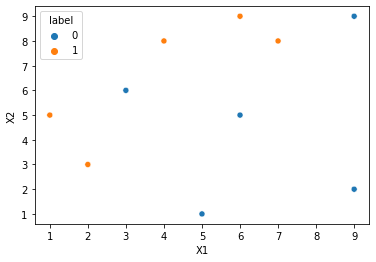

In [339]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [340]:
df.shape[0]

10

In [341]:
df['weights']=1/df.shape[0]

In [342]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [343]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1) #max depth is taken as 1 to make it a decision stump 

In [344]:
X=df.iloc[:,0:2].values  # .values converts dataframe to array
Y=df.iloc[:,2].values

In [345]:
#Training first decision stump
dt1.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

In [346]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

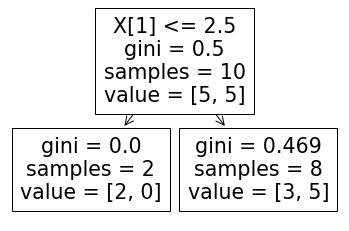

In [347]:
plot_tree(dt1)

<AxesSubplot:>

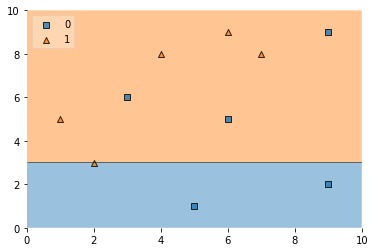

In [348]:
plot_decision_regions(X,Y,clf=dt1,legend=2)

The model has done 3 mistakes. 3 blue points are present in orange region

In [349]:
df['y_pred']=dt1.predict(X) #putting the training dataset for testing and recording the results in new column

In [350]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [351]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [352]:
#calculate model weight
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [353]:
#Update weights- Increase weights of wrong classification and reduce weights of right classification
def update_row_weights(row,alpha=0.423): #If no alpha parameter is passed while calling the function, take alpha as 0.423
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [354]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [355]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


Note that all right classification has low weight(0.065508) but all right classifications has high weight(0.152653)

In [356]:
df['updated_weights'].sum()

0.9165153319682015

In [357]:
df['normalised_weights']=df['updated_weights']/df['updated_weights'].sum()

In [358]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [359]:
df['normalised_weights'].sum()

1.0

In [360]:
#now we will have to make the ranges
df['upper']=np.cumsum(df['normalised_weights']) #cumsum stands for cumulative sum

In [361]:
df['lower']=df['upper']-df['normalised_weights']

In [362]:
df.columns

Index(['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights',
       'normalised_weights', 'upper', 'lower'],
      dtype='object')

In [363]:
df=df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights',
       'normalised_weights','lower','upper']]

In [364]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,lower,upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [365]:
def create_new_dataset(df):
    indices=[]
    
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['upper']>a and a>row['lower']:
                indices.append(index)
    return indices

In [366]:
index_values=create_new_dataset(df)
index_values

[9, 8, 9, 8, 5, 6, 2, 2, 5, 8]

In [367]:
second_df=df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
9,9,2,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1


[Text(0.5, 0.75, 'X[1] <= 7.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'), Text(0.75, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]')]


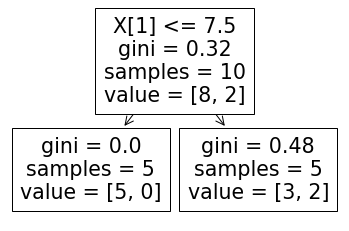

In [368]:
dt2=DecisionTreeClassifier(max_depth=1)
X=second_df.iloc[:,0:2].values  # .values converts dataframe to array
Y=second_df.iloc[:,2].values
dt2.fit(X,Y)
print(plot_tree(dt2))

C:\Users\sayan\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

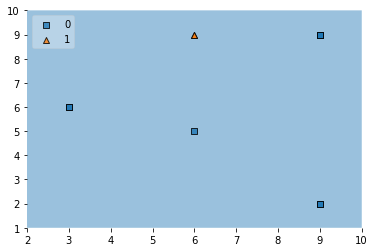

In [369]:
plot_decision_regions(X,Y,clf=dt2,legend=2)

In [370]:
second_df['y_pred']=dt2.predict(X)

In [371]:
second_df

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0
8,9,9,0,0.1,0


In [372]:
alpha2=calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [373]:
def update_row_weights(row,alpha=1.0986): #If no alpha parameter is passed while calling the function, take alpha as 0.423
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [374]:
second_df['updated_weights']=second_df.apply(update_row_weights,axis=1)

In [375]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
9,9,2,0,0.1,0,0.033334
8,9,9,0,0.1,0,0.033334
9,9,2,0,0.1,0,0.033334
8,9,9,0,0.1,0,0.033334
5,6,9,1,0.1,0,0.299996
6,6,5,0,0.1,0,0.033334
2,3,6,0,0.1,0,0.033334
2,3,6,0,0.1,0,0.033334
5,6,9,1,0.1,0,0.299996
8,9,9,0,0.1,0,0.033334


In [376]:
second_df['normalised_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [377]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
9,9,2,0,0.1,0,0.033334,0.038462
8,9,9,0,0.1,0,0.033334,0.038462
9,9,2,0,0.1,0,0.033334,0.038462
8,9,9,0,0.1,0,0.033334,0.038462
5,6,9,1,0.1,0,0.299996,0.346151
6,6,5,0,0.1,0,0.033334,0.038462
2,3,6,0,0.1,0,0.033334,0.038462
2,3,6,0,0.1,0,0.033334,0.038462
5,6,9,1,0.1,0,0.299996,0.346151
8,9,9,0,0.1,0,0.033334,0.038462


In [378]:
second_df['normalised_weights'].sum()

0.9999999999999998

In [379]:
second_df['upper']=np.cumsum(second_df['normalised_weights'])
second_df['lower']=second_df['upper']-second_df['normalised_weights']
second_df=second_df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights',
       'normalised_weights','lower','upper']]

In [380]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,lower,upper
9,9,2,0,0.1,0,0.033334,0.038462,0.000000,0.038462
8,9,9,0,0.1,0,0.033334,0.038462,0.038462,0.076924
9,9,2,0,0.1,0,0.033334,0.038462,0.076924,0.115387
8,9,9,0,0.1,0,0.033334,0.038462,0.115387,0.153849
5,6,9,1,0.1,0,0.299996,0.346151,0.153849,0.500000
6,6,5,0,0.1,0,0.033334,0.038462,0.500000,0.538462
2,3,6,0,0.1,0,0.033334,0.038462,0.538462,0.576924
2,3,6,0,0.1,0,0.033334,0.038462,0.576924,0.615387
5,6,9,1,0.1,0,0.299996,0.346151,0.615387,0.961538
8,9,9,0,0.1,0,0.033334,0.038462,0.961538,1.000000


In [381]:
index_values=create_new_dataset(second_df)
index_values

[8, 2, 8, 5, 5, 2, 9, 5, 6, 6]

In [382]:
third_df=second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
5,6,9,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1


[Text(0.5, 0.75, 'X[1] <= 7.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'), Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]


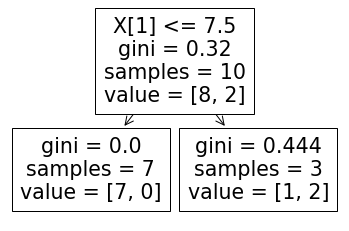

In [383]:
dt3=DecisionTreeClassifier(max_depth=1)
X=third_df.iloc[:,0:2].values  # .values converts dataframe to array
Y=third_df.iloc[:,2].values
dt3.fit(X,Y)
print(plot_tree(dt3))

<AxesSubplot:>

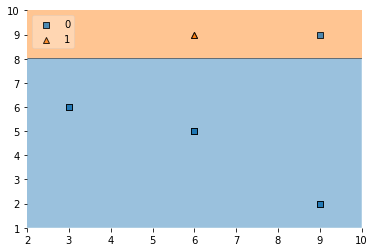

In [384]:
plot_decision_regions(X,Y,clf=dt3,legend=2)

In [385]:
third_df['y_pred']=dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
9,9,2,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,1
6,6,5,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0


In [386]:
alpha3=calculate_model_weight(0.2)
alpha3

0.6931471805599453

In [387]:
def update_row_weights(row,alpha=0.693): #If no alpha parameter is passed while calling the function, take alpha as 0.693
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [388]:
third_df['updated_weights']=third_df.apply(update_row_weights,axis=1)
third_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.050007
9,9,2,0,0.1,0,0.050007
5,6,9,1,0.1,1,0.050007
6,6,5,0,0.1,0,0.050007
6,6,5,0,0.1,0,0.050007
9,9,2,0,0.1,0,0.050007
8,9,9,0,0.1,1,0.199971
6,6,5,0,0.1,0,0.050007
2,3,6,0,0.1,0,0.050007
2,3,6,0,0.1,0,0.050007


In [389]:
third_df['normalised_weights']=third_df['updated_weights']/third_df['updated_weights'].sum()
third_df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
5,6,9,1,0.1,1,0.050007,0.07693
9,9,2,0,0.1,0,0.050007,0.07693
5,6,9,1,0.1,1,0.050007,0.07693
6,6,5,0,0.1,0,0.050007,0.07693
6,6,5,0,0.1,0,0.050007,0.07693
9,9,2,0,0.1,0,0.050007,0.07693
8,9,9,0,0.1,1,0.199971,0.30763
6,6,5,0,0.1,0,0.050007,0.07693
2,3,6,0,0.1,0,0.050007,0.07693
2,3,6,0,0.1,0,0.050007,0.07693


In [390]:
third_df['upper']=np.cumsum(third_df['normalised_weights'])
third_df['lower']=third_df['upper']-third_df['normalised_weights']
third_df=third_df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights',
       'normalised_weights','lower','upper']]

In [391]:
third_df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,lower,upper
5,6,9,1,0.1,1,0.050007,0.07693,0.00000,0.07693
9,9,2,0,0.1,0,0.050007,0.07693,0.07693,0.15386
5,6,9,1,0.1,1,0.050007,0.07693,0.15386,0.23079
6,6,5,0,0.1,0,0.050007,0.07693,0.23079,0.30772
6,6,5,0,0.1,0,0.050007,0.07693,0.30772,0.38465
9,9,2,0,0.1,0,0.050007,0.07693,0.38465,0.46158
8,9,9,0,0.1,1,0.199971,0.30763,0.46158,0.76921
6,6,5,0,0.1,0,0.050007,0.07693,0.76921,0.84614
2,3,6,0,0.1,0,0.050007,0.07693,0.84614,0.92307
2,3,6,0,0.1,0,0.050007,0.07693,0.92307,1.00000


In [392]:
index_values=create_new_dataset(third_df)
index_values

[6, 5, 2, 9, 8, 8, 9, 8, 5, 6]

In [393]:
fourth_df=third_df.iloc[index_values,[0,1,2,3]]
fourth_df

,X1,X2,label,weights
8,9,9,0,0.1
9,9,2,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1


# Prediction

In [394]:
query=np.array([1,5]).reshape(1,2)

In [395]:
print(dt1.predict(query))
print(dt2.predict(query))
print(dt3.predict(query))
print(alpha1*1 + alpha2*1 + alpha3*0)
print(np.sign((alpha1*1 + alpha2*1 + alpha3*0)))

[1]
[0]
[0]
1.5222612188617117
1.0


In [396]:
np.sign((alpha1*1 + alpha2*1 + alpha3*0))

1.0

In [397]:
query=np.array([9,9]).reshape(1,2)

In [398]:
print(dt1.predict(query))
print(dt2.predict(query))
print(dt3.predict(query))
print(alpha1*1 + alpha2*1 + alpha3*0)
print(np.sign((alpha1*1 + alpha2*1 + alpha3*0)))

[1]
[0]
[1]
1.5222612188617117
1.0
